In [1]:
# Import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data

df = pd.read_csv('/Users/chodaehyeon/Downloads/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [4]:
# Understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Preprocessing

In [6]:
# Delete column

df.drop(columns = ['Unnamed: 0'], inplace = True)

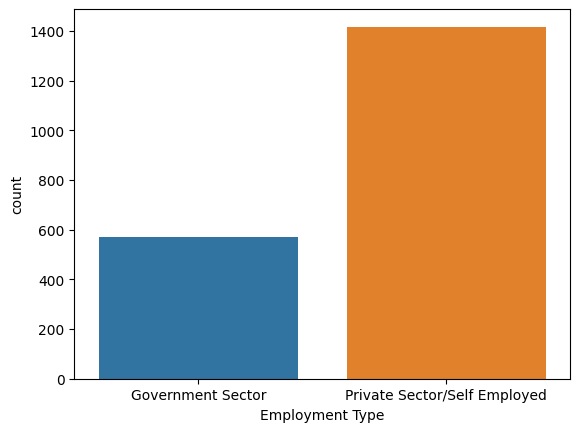

In [7]:
sns.countplot(data = df, x = 'Employment Type')
plt.show()

In [8]:
# Categorical value to numerical code

df.replace({'Employment Type' : {"Government Sector" : 1}}, inplace = True)
df.replace({'Employment Type' : {"Private Sector/Self Employed" : 0}}, inplace = True)

In [9]:
df.replace({'GraduateOrNot' : {"Yes" : 1}}, inplace = True)
df.replace({'GraduateOrNot' : {"No" : 0}}, inplace = True)

In [10]:
df.replace({'FrequentFlyer' : {"Yes" : 1}}, inplace = True)
df.replace({'FrequentFlyer' : {"No" : 0}}, inplace = True)

In [11]:
df.replace({'EverTravelledAbroad' : {"Yes" : 1}}, inplace = True)
df.replace({'EverTravelledAbroad' : {"No" : 0}}, inplace = True)

In [12]:
# Replace column name

df.rename(columns = {'Employment Type' : 'IsGovernmentSector', 'FrequentFlyer' : 'Above4FlightsLast2Years'}, inplace = True)

In [13]:
df.head()

,Age,IsGovernmentSector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,Above4FlightsLast2Years,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


<Axes: >

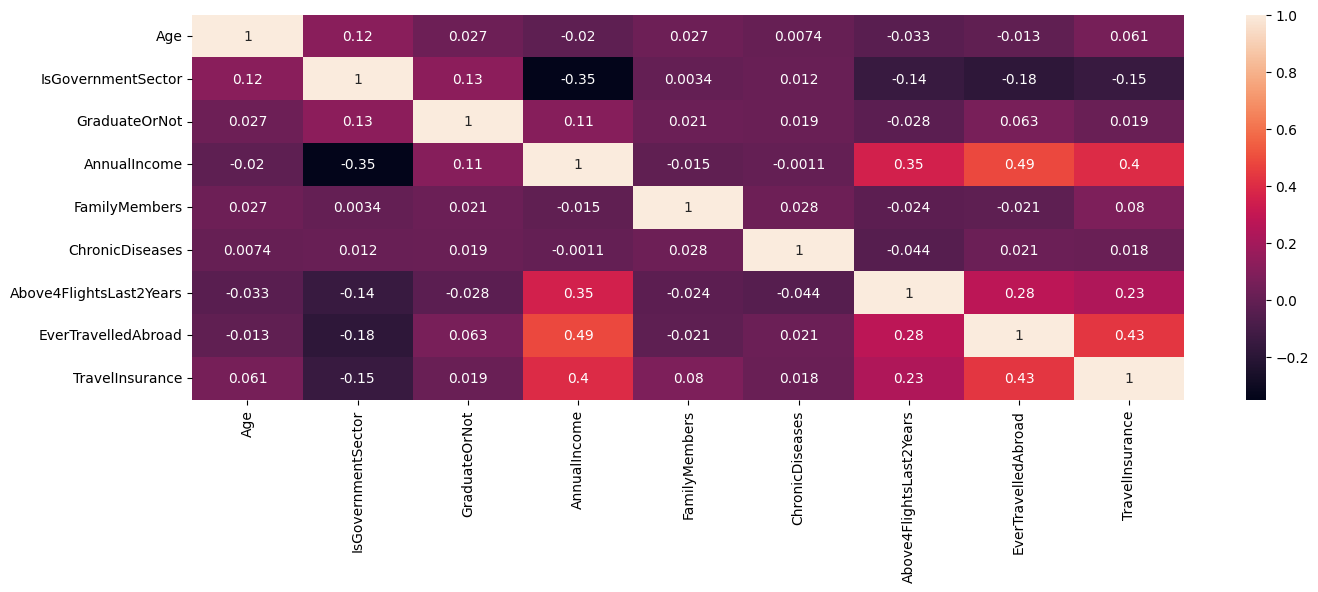

In [14]:
# Correlation heatmap

dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [15]:
# Delete a column with a correlation coefficient of abs(0.05) or less

df.drop(columns = ['GraduateOrNot', 'ChronicDiseases'], inplace = True)

In [16]:
df.head()

,Age,IsGovernmentSector,AnnualIncome,FamilyMembers,Above4FlightsLast2Years,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,0,0,0
1,31,0,1250000,7,0,0,0
2,34,0,500000,4,0,0,1
3,28,0,700000,3,0,0,0
4,28,0,700000,8,1,0,0


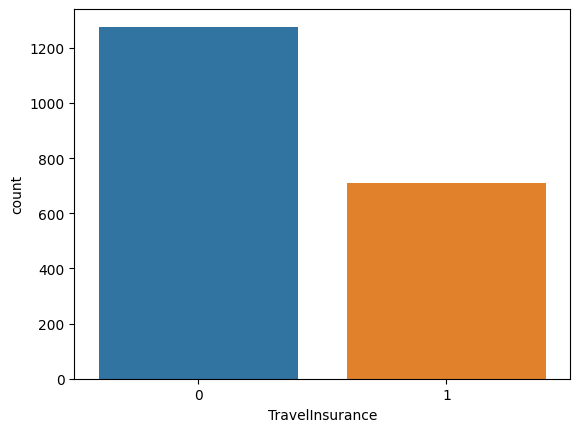

TravelInsurance
0    1277
1     710
dtype: int64


In [17]:
# Check if dataset is balanced

sns.countplot(data = df, x = 'TravelInsurance')
plt.show()

size = df.groupby("TravelInsurance").size()
print(size)

### Classification(KNN)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Split the training and testing data (7 : 3)

training_points = df.drop(columns=['TravelInsurance'])
training_labels = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size = 0.3, 
	random_state = 4)

In [20]:
# KNN, k = 5

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 

In [21]:
# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[360  32]
 [ 87 118]]
0.8006700167504187


[0.7353433835845896, 0.7906197654941374, 0.7755443886097152, 0.8090452261306532, 0.8006700167504187, 0.8090452261306532, 0.7939698492462312, 0.7989949748743719, 0.8006700167504187, 0.8123953098827471, 0.8107202680067002, 0.8006700167504187, 0.8040201005025126, 0.7989949748743719, 0.8006700167504187, 0.8006700167504187, 0.8023450586264657, 0.7973199329983249, 0.7939698492462312, 0.7956448911222781, 0.7956448911222781, 0.7973199329983249, 0.7872696817420436, 0.7922948073701842, 0.7705192629815746, 0.7788944723618091, 0.7772194304857621, 0.7671691792294807, 0.7705192629815746, 0.7654941373534339, 0.7654941373534339, 0.7688442211055276, 0.7671691792294807, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7705192629815746, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214, 0.7721943048576214]


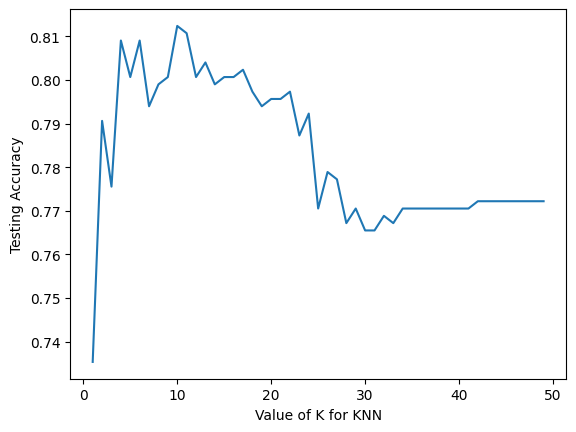

In [22]:
# k = (1, 50)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [23]:
# Split the training and testing data (8 : 2)

training_points = df.drop(columns=['TravelInsurance'])
training_labels = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size = 0.2, 
	random_state = 4)

[0.7487437185929648, 0.7814070351758794, 0.8015075376884422, 0.8115577889447236, 0.7864321608040201, 0.8090452261306532, 0.8015075376884422, 0.8065326633165829, 0.8040201005025126, 0.8040201005025126, 0.7964824120603015, 0.8015075376884422, 0.7914572864321608, 0.7939698492462312, 0.7964824120603015, 0.7964824120603015, 0.7939698492462312, 0.7889447236180904, 0.7889447236180904, 0.7864321608040201, 0.7889447236180904, 0.7914572864321608, 0.7914572864321608, 0.7889447236180904, 0.7864321608040201, 0.7864321608040201, 0.7914572864321608, 0.7864321608040201, 0.7889447236180904, 0.7814070351758794, 0.7839195979899497, 0.7763819095477387, 0.7763819095477387, 0.7738693467336684, 0.7688442211055276, 0.7613065326633166, 0.7688442211055276, 0.7613065326633166, 0.7663316582914573, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7613065326633166, 0.7638190954773869, 0.7638190954773869]


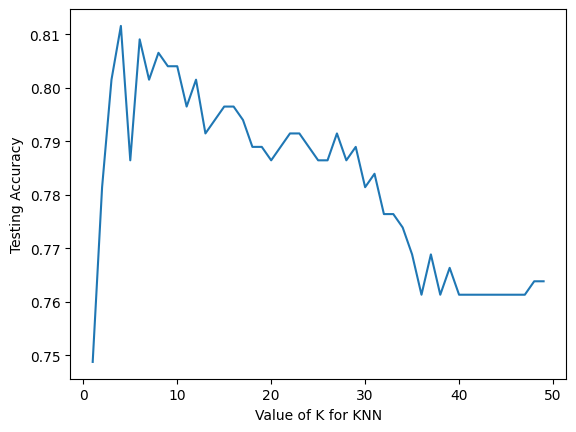

In [24]:
# k = (1, 50)

k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### GaussianNB

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
# GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[[225  34]
 [ 73  66]]
0.7311557788944724


### RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Random Forest (n = 20)

classifier = RandomForestClassifier(random_state = 0, n_estimators = 20)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0]
[[231  28]
 [ 48  91]]
0.8090452261306532


[0.7738693467336684, 0.7814070351758794, 0.7939698492462312, 0.7889447236180904, 0.7738693467336684, 0.7763819095477387, 0.7814070351758794, 0.7814070351758794, 0.7839195979899497, 0.7864321608040201, 0.7914572864321608, 0.7864321608040201, 0.7939698492462312, 0.7864321608040201, 0.7864321608040201, 0.7939698492462312, 0.7939698492462312, 0.8015075376884422, 0.8040201005025126, 0.8090452261306532, 0.8065326633165829, 0.8065326633165829, 0.8040201005025126, 0.7989949748743719, 0.7939698492462312, 0.7989949748743719, 0.7989949748743719, 0.8015075376884422, 0.7939698492462312, 0.8065326633165829, 0.7989949748743719, 0.7989949748743719, 0.7989949748743719, 0.7989949748743719, 0.7989949748743719, 0.7964824120603015, 0.7964824120603015, 0.7989949748743719, 0.8015075376884422, 0.7989949748743719, 0.7964824120603015, 0.7989949748743719, 0.7989949748743719, 0.7989949748743719, 0.8015075376884422, 0.8040201005025126, 0.8040201005025126, 0.8015075376884422, 0.8015075376884422, 0.8040201005025126,

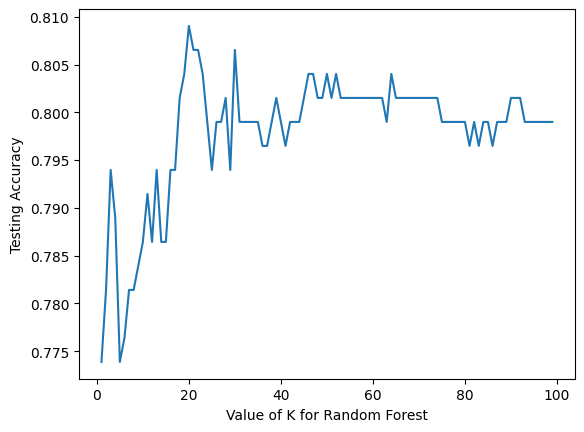

In [29]:
# n = (1, 100)

k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = RandomForestClassifier(random_state = 0, n_estimators = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# LogisticRegression

classifier = LogisticRegression(random_state=4)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[259   0]
 [139   0]]
0.6507537688442211


### Staking

In [37]:
# Import Classifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [38]:
# Define base models

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors = 5)),
    ('NB', GaussianNB()),
    ('randomForest', RandomForestClassifier(random_state = 0, n_estimators = 20))
]

meta_model = LogisticRegression(max_iter = 5000)

classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model, cv = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[237  22]
 [ 59  80]]
0.7964824120603015


In [40]:
# Define base models

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors = 5)),
    ('NB', GaussianNB()),
    ('randomForest', RandomForestClassifier(random_state = 0, n_estimators = 20)),
    ('adaBoost', AdaBoostClassifier(random_state = 0, n_estimators = 80))
]

meta_model = LogisticRegression(max_iter = 5000)

classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model, cv = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

# Score model

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[237  22]
 [ 59  80]]
0.7964824120603015
